# Iris dataset

### Importing Iris dataset

In [ ]:
import pandas as pd
Iris = pd.read_csv("Iris_dataset.csv")
Iris

In [ ]:
import seaborn as sns
sns.scatterplot(x='sepal.length', y='sepal.width', hue='variety', style='variety', s=100, data=Iris)

In [ ]:
sns.scatterplot(x='petal.length', y='petal.width', hue='variety', style='variety', s=100, data=Iris)

### Partitioning dataset into separate traning and test sets

In [ ]:
# Using scikit-learn
from sklearn.model_selection import train_test_split
X=Iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y=Iris['variety']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=0,
                                                    stratify=y)

### Decision tree

##### Learning

In [ ]:
# Constructing tree
from sklearn import tree

DT=tree.DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
DT.fit(X_train, y_train)

##### Plot

In [ ]:
# Plotting tree
tree.plot_tree(DT)

##### For a better plot: Install "graphviz" and "pydotplus" at Anaconda propot

- conda install python-graphviz
- conda install pydotplus

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(DT, out_file=None, 
                      feature_names=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'],  
                      class_names=['setosa', 'versicolor', 'virginica'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graph_from_dot_data(dot_data)  
graph.write_png('DT_iris.png')

##### Evaluation

In [ ]:
# Prediction using train dataset
y_pred = DT.predict(X_test)
y_pred

In [ ]:
# Confusion matrix & measurements
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# PM Intention Dataset

### Data preparation

In [ ]:
# Import
PM = pd.read_csv("E_scooter_intention.csv")
PM

- Data description
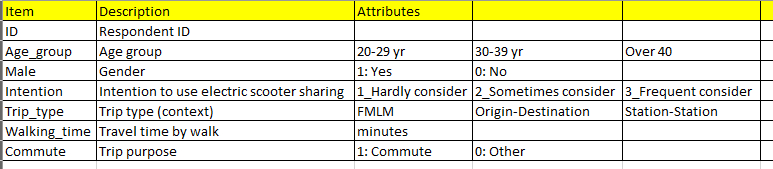

In [ ]:
# Frequency of intention
Intention_freq = pd.pivot_table(PM, values='ID', index=['Intention'], aggfunc='count', margins=True)
Intention_freq 

In [ ]:
# Transform nominal variable to bianry variable: Age_group
def Age20(row):
    if (row['Age_group'] == '20-29 yr'):
        return 1
    else:
        return 0
    
def Age30(row):
    if (row['Age_group'] == '30-39 yr'):
        return 1
    else:
        return 0

PM['Age20'] = PM.apply(lambda row: Age20(row), axis=1)
PM['Age30'] = PM.apply(lambda row: Age30(row), axis=1)

PM

In [ ]:
# Transform nominal variable to bianry variable: Trip_type
def FMLM(row):
    if (row['Trip_type'] == 'FMLM'):
        return 1
    else:
        return 0
    
def OD(row):
    if (row['Trip_type'] == 'Origin-Destination'):
        return 1
    else:
        return 0

PM['FMLM'] = PM.apply(lambda row: FMLM(row), axis=1)
PM['OD'] = PM.apply(lambda row: OD(row), axis=1)

PM

### Develop a decision tree of forecasting individual's intention to use PM
- Selected features for tree building:
- + Dependent variable = 'Intention'
- + Independent variables = 'Age20', 'Age30', 'Male', 'FMLM', 'OD', 'Walking_time', 'Commute'
- Training set = 80% of the data
- Purity measure = GINI
- Maximum depth = 5

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X=PM[['Age20', 'Age30', 'Male', 'FMLM', 'OD', 'Walking_time', 'Commute']]
y=PM['Intention']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=0,
                                                    stratify=y)


DT_PM=tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
DT_PM.fit(X_train, y_train)

In [ ]:
dot_data = export_graphviz(DT_PM, out_file=None, 
                      feature_names=['Age20', 'Age30', 'Male', 'FMLM', 'OD', 'Walking_time', 'Commute'],  
                      class_names=['1_Hardly consider','2_Sometimes consider','3_Frequent consider'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graph_from_dot_data(dot_data)  
graph.write_png('DT_PM.png')

In [ ]:
y_pred = DT_PM.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

- "Precision": the ability of the classifier not to label a negative sample as positive
- "Recall": the ability of the classifier to find all the positive samples
- "f1": harmonic mean of the precision and recall
- "support": the number of occurrences of each class in y_true

### Improve the model by increasing depth

##### Learning & Evaluation

In [ ]:
DT_PM7=tree.DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=1)
DT_PM7.fit(X_train, y_train)
y_pred = DT_PM7.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

##### Plot

In [ ]:
dot_data = export_graphviz(DT_PM7, out_file=None, 
                      feature_names=['Age20', 'Age30', 'Male', 'FMLM', 'OD', 'Walking_time', 'Commute'],  
                      class_names=['1_Hardly consider','2_Sometimes consider','3_Frequent consider'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graph_from_dot_data(dot_data)  
graph.write_png('DT_PM7.png')

### Improve the model using random forest approach

##### Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=50, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

##### Evaluation

In [ ]:
y_pred = forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

##### Plot: A single tree

In [ ]:
dot_data = export_graphviz(forest.estimators_[0], out_file=None, 
                      feature_names=['Age20', 'Age30', 'Male', 'FMLM', 'OD', 'Walking_time', 'Commute'],  
                      class_names=['1_Hardly consider','2_Sometimes consider','3_Frequent consider'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graph_from_dot_data(dot_data)  
graph.write_png('DT_PM_forest0.png')

# Smart Travel Card Data

### Develop a decision tree of classifying public transportation user type using smart travel card data
- Selected features for tree building:
- + Dependent variable = 'User'
- + Independent variables = 'Subway', 'On_hour', 'Travel time'
- Training set = 80% of the data
- Purity measure = GINI
- Maximum depth = 5

### Data preparation

In [ ]:
Cdata = pd.read_csv("Transit_card_single_day_c.csv")
Cdata

In [ ]:
# Transform nominal variable to bianry variable: Trip_type
def Subway(row):
    if (row['Mode'] == 'subway'):
        return 1
    else:
        return 0

Cdata['Subway'] = Cdata.apply(lambda row: Subway(row), axis=1)

Cdata

In [ ]:
# Travel time cacluation (unit = minutes)
Cdata['T_time'] = (((Cdata.Off_hour*60)+Cdata.Off_min+(Cdata.Off_sec/60))
                 - ((Cdata.On_hour*60)+Cdata.On_min+(Cdata.On_sec/60)))
Cdata

### Learning

In [ ]:
X=Cdata[['Subway', 'On_hour', 'T_time']]
y=Cdata['User']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=0,
                                                    stratify=y)


DT_PT_user=tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
DT_PT_user.fit(X_train, y_train)

### Plot

In [ ]:
dot_data = export_graphviz(DT_PT_user, out_file=None, 
                      feature_names=['Subway', 'On_hour', 'T_time'],  
                      class_names=['disabled','elderly','kids','normal','teen'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graph_from_dot_data(dot_data)  
graph.write_png('DT_PT_user.png')

### Evaluation

In [ ]:
y_pred = DT_PT_user.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Improve the model using random forest approach

In [ ]:
PT_user_forest = RandomForestClassifier(criterion='gini', n_estimators=50, random_state=1, n_jobs=2)
PT_user_forest.fit(X_train, y_train)

In [ ]:
y_pred = PT_user_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))